In [2]:
!pip install folium
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

In [22]:
%matplotlib inline

# Part1

In [3]:
wiki_table_url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [4]:
wiki_table = pd.read_html(wiki_table_url)[0]
wiki_table = wiki_table[wiki_table.Borough!='Not assigned']

In [5]:
wiki_table.head()

,Postal code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [6]:
wiki_table.shape

(103, 3)

# Part2

In [7]:
geo_cordinates = pd.read_csv('https://cocl.us/Geospatial_data')

In [8]:
wiki_geo_merge = wiki_table.merge(geo_cordinates,how='inner',left_on='Postal code',right_on='Postal Code')

In [9]:
wiki_geo_merge.head()

,Postal code,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,M3A,North York,Parkwoods,M3A,43.753259,-79.329656
1,M4A,North York,Victoria Village,M4A,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park / Harbourfront,M5A,43.654260,-79.360636
3,M6A,North York,Lawrence Manor / Lawrence Heights,M6A,43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,M7A,43.662301,-79.389494


# part3

In [10]:
features = wiki_geo_merge[['Borough','Latitude','Longitude']]
features = pd.get_dummies(features,columns=['Borough'])

In [11]:
features.head()

,Latitude,Longitude,Borough_Central Toronto,Borough_Downtown Toronto,Borough_East Toronto,Borough_East York,Borough_Etobicoke,Borough_Mississauga,Borough_North York,Borough_Scarborough,Borough_West Toronto,Borough_York
0,43.753259,-79.329656,0,0,0,0,0,0,1,0,0,0
1,43.725882,-79.315572,0,0,0,0,0,0,1,0,0,0
2,43.654260,-79.360636,0,1,0,0,0,0,0,0,0,0
3,43.718518,-79.464763,0,0,0,0,0,0,1,0,0,0
4,43.662301,-79.389494,0,1,0,0,0,0,0,0,0,0


In [12]:
# Optimal k
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    Sum_of_squared_distances.append(km.inertia_)

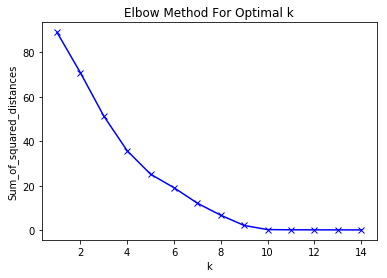

In [13]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [14]:
km = KMeans(n_clusters=10)
km.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
clusters =  km.predict(features)

In [16]:
wiki_geo_merge['clusters'] = clusters

In [18]:
wiki_geo_merge['color'] = wiki_geo_merge['clusters'].replace({0: 'red', 
                                                           1: 'blue', 
                                                           2: 'green', 
                                                           3: 'purple',
                                                          4: 'orange',
                                                          5: 'darkred',
                                                          6: 'lightred',
                                                          7: 'beige',
                                                          8: 'darkblue',
                                                          9: 'pink',
                                                          10: 'black',})

In [19]:
wiki_geo_merge.head()

,Postal code,Borough,Neighborhood,Postal Code,Latitude,Longitude,clusters,color
0,M3A,North York,Parkwoods,M3A,43.753259,-79.329656,0,red
1,M4A,North York,Victoria Village,M4A,43.725882,-79.315572,0,red
2,M5A,Downtown Toronto,Regent Park / Harbourfront,M5A,43.654260,-79.360636,1,blue
3,M6A,North York,Lawrence Manor / Lawrence Heights,M6A,43.718518,-79.464763,0,red
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,M7A,43.662301,-79.389494,1,blue


In [23]:
#plot
plot_map = folium.Map(location=[wiki_geo_merge['Latitude'].mean(), 
                                wiki_geo_merge['Longitude'].mean()], 
                                zoom_start=11)
#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in wiki_geo_merge.itertuples():
    folium.Marker(location=[row.Latitude,  row.Longitude],popup=row.clusters,icon=folium.Icon(color=row.color)).add_to(plot_map)

plot_map